In [27]:
#        https://youtu.be/idb1kgIInHY <- 유튜브 주소

import pandas as pd
import numpy as np
import matplotlib
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
# 폰트깨짐을 방지하기 위한 폰트 변경
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
covid = pd.read_excel('data/covid.xlsx')

<AxesSubplot:xlabel='date'>

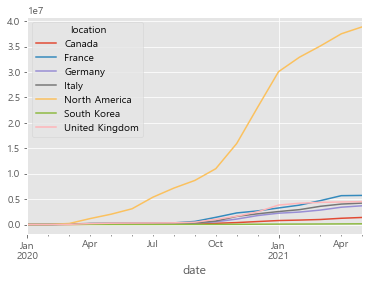

In [385]:
covid_G7=covid[covid.location.isin(['South Korea', 'Japen','Germany','United Kingdom','France','Canada','Italy','North America'])]
covid_G7_month=covid_G7[['location','date',
                   'total_cases','new_cases']]
plt.style.use('ggplot')
covid_G7_month=covid_G7_month[covid_G7_month.date.isin(pd.date_range(start=covid_G7_month.date.min(),end=covid_G7_month.date.max(),freq='M'))]
covid_G7_month.set_index(['date','location']).unstack()['total_cases'].plot()

<AxesSubplot:xlabel='date'>

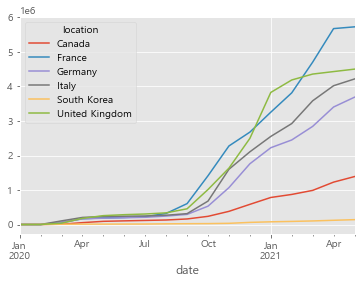

In [362]:
covid_G7=covid[covid.location.isin(['South Korea', 'Japen','Germany','United Kingdom','France','Canada','Italy'])]
covid_G7_month=covid_G7[['location','date',
                   'total_cases','new_cases']]
covid_G7_month=covid_G7_month[covid_G7_month.date.isin(pd.date_range(start=covid_G7_month.date.min(),end=covid_G7_month.date.max(),freq='M'))]
covid_G7_month.set_index(['date','location']).unstack()['total_cases'].plot()

<AxesSubplot:xlabel='date'>

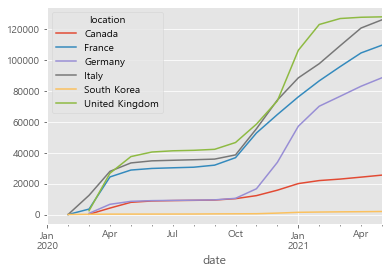

In [364]:
covid_G7_death=covid_G7[['location','date',
                   'total_deaths','new_deaths']]
covid_G7_death=covid_G7_death[covid_G7_death.date.isin(pd.date_range(start=covid_G7_death.date.min(),end=covid_G7_death.date.max(),freq='M'))]
covid_G7_death.set_index(['date','location']).unstack()['total_deaths'].plot()
#G7국가 코로나 사망자 추이

<AxesSubplot:xlabel='date'>

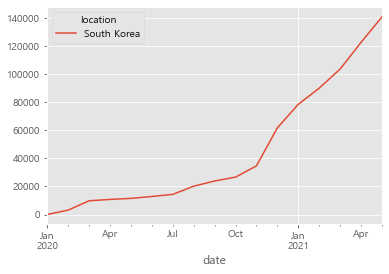

In [367]:
covid_south=covid[covid.location.isin(['South Korea'])]
covid_south=covid_south[['location','date',
                   'total_cases','new_cases']]
covid_south=covid_south[covid_south.date.isin(pd.date_range(start=covid_south.date.min(),end=covid_south.date.max(),freq='M'))]
covid_south.set_index(['date','location']).unstack()['total_cases'].plot()
# 한국 총 확진자 수 추이

<AxesSubplot:xlabel='year,quarter'>

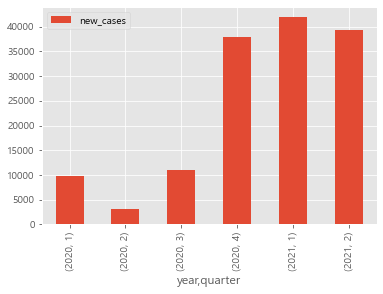

In [388]:
covid_south['year'] = covid.date.apply(lambda X : X.strftime('%Y'))
covid_south['month'] = covid.date.apply(lambda X : X.strftime('%m'))
covid_south['day'] = covid.date.apply(lambda X : X.strftime('%d'))
covid_south['quarter']=covid_south.date.apply(lambda X : pd.Timestamp(X).quarter)
covid_south_quarter=covid_south.pivot_table(index=['year','quarter'],aggfunc='sum',values='new_cases')
covid_south_quarter.plot(kind='bar')
#한국 분기별 감염자 추이


<AxesSubplot:xlabel='date'>

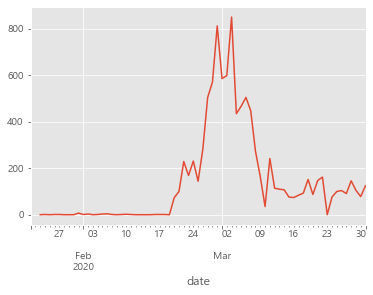

In [371]:
#1차 신규확진자 증가 1월~3월  2월 대구 신천지
covid_south=covid[covid.location.isin(['South Korea'])]
covid_south=covid_south[['location','date',
                   'total_cases','new_cases']]
first=covid_south[covid_south.date.isin(pd.date_range(start = '20200101', end = '20200331'))]
first.set_index('date',inplace=True)
first.new_cases.plot()


<AxesSubplot:xlabel='date'>

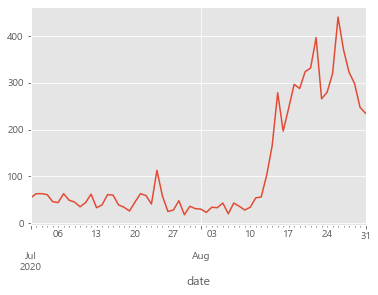

In [372]:
#2차 신규 확진자 증가 7월에서 8월 5월 이태원 이후 클럽등에서 계속 증가 8월 사랑제일교회 이후 
second=covid_south[covid_south.date.isin(pd.date_range(start = '20200701', end = '20200831'))]
second.set_index('date',inplace=True)
second.new_cases.plot()


<AxesSubplot:xlabel='date'>

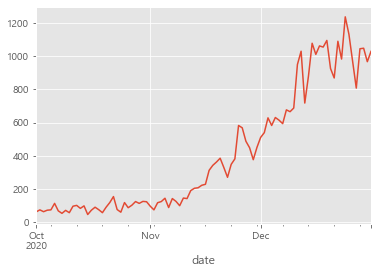

In [375]:
#3차 신규 확진자 증가 10월에서 12월말  뚜렷한 원인이 없음 전문가는 경계심이 누그러진게 원인이라고 함
third=covid_south[covid_south.date.isin(pd.date_range(start = '20201001', end = '20201231'))]
third.set_index('date',inplace=True)
third.new_cases.plot()

In [376]:
import requests, bs4
import pandas as pd
from lxml import html
from urllib.request import Request, urlopen # 공공api를 사용하기 위한 라이브러리 호출
from urllib.parse import urlencode, quote_plus, unquote #위와 동일

xmlUrl ='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson'
My_API_Key=unquote('nZFq9%2FNQuPRSudJQGtRTcgS9bchxe7yLzvAfXrESf8BoPVq7YFyxtioeemhQ%2BTRwIwnIGOeET95FGGGYWxhL8Q%3D%3D')
querryParams ='?'+urlencode(
{
    quote_plus('ServiceKey') : My_API_Key, # 내 서비스 키
    quote_plus('startCreateDt') : 20200201, #데이터 수집 시작날짜
    quote_plus('endCreateDt') : 20201231 # 데이터 수집 끝 날짜
})
response = requests.get(xmlUrl + querryParams).text.encode('utf-8')
xmlobj = bs4.BeautifulSoup(response, 'lxml-xml')

#공공 데이터 포털에서 자료를 신청한 후 api키를 받아 데이터를 불러왔다.

#item 태그로 분리
rows = xmlobj.findAll('item')
# 이 시점에서 알아볼 수는 없지만 데이터를 받아오는데 성공한다.
#반복문을 사용해서 rows[n]의 모든 데이터를 컬럼화해서 리스트로 만들었다.
rowList = []
nameList = []
columnList = []

rowsLen = len(rows)
for i in range(0, rowsLen): 
    columns = rows[i].find_all()
    
    columnsLen = len(columns) 
    for j in range(0, columnsLen): 
        if i == 0:
            nameList.append(columns[j].name)
        eachColumn = columns[j].text
        columnList.append(eachColumn)
    rowList.append(columnList)
    columnList = []    # 다음 row의 값을 넣기 위해 비워준다. (매우 중요!!)
    
result = pd.DataFrame(rowList, columns=nameList)
result

,confCase,confCaseRate,createDt,criticalRate,death,deathRate,gubun,seq,updateDt
0,158,1.37,2020-06-01 00:00:00.000,0,0,0,0-9,7911,NULL
1,659,5.73,2020-06-01 00:00:00.000,0,0,0,10-19,7910,NULL
2,3176,27.61,2020-06-01 00:00:00.000,0,0,0,20-29,7909,NULL
3,1296,11.27,2020-06-01 00:00:00.000,0.15,2,0.74,30-39,7908,NULL
4,1527,13.27,2020-06-01 00:00:00.000,0.2,3,1.11,40-49,7907,NULL
...,...,...,...,...,...,...,...,...,...
2965,1257,12.6,2020-04-02 19:02:48.48,1.78,22,13.58,60-69,5,null
2966,663,6.65,2020-04-02 19:02:48.48,7.07,46,28.4,70-79,4,null
2967,453,4.54,2020-04-02 19:02:48.48,18.55,82,50.62,80 이상,3,null
2968,5997,60.11,2020-04-02 19:02:48.48,1.36,80,49.38,여성,2,null


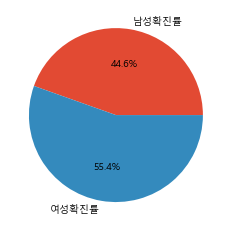

In [389]:
#원하는 컬럼만 추출
korea = result[['gubun','confCase','confCaseRate','death','deathRate',
                'criticalRate','createDt']]
#영어라 보기 힘드니까 한글로!
korea = korea.rename(columns={
    'gubun':'구분',
    'confCase':'확진자',
    'confCaseRate':'확진률',
    'death':'사망자',
    'deathRate':'사망률',
    'criticalRate':'치명률',
    'createDt':'등록일',
})
korea.등록일 = pd.to_datetime(korea.등록일, format = '%Y-%m-%d')

korea_w= korea[korea.구분=='여성']
korea_m= korea[korea.구분=='남성']
korea_m=korea_m.sort_values(by='등록일')
korea_w=korea_w.sort_values(by='등록일')

korea_m.확진률=korea_m.확진률.astype('float')
korea_m.사망률=korea_m.사망률.astype('float')

korea_w.확진률=korea_w.확진률.astype('float')
korea_w.사망률=korea_w.사망률.astype('float')


korea_m=korea_m.rename(columns={
    '확진률':'남성확진률'
})
korea_w=korea_w.rename(columns={
    '확진률':'여성확진률'
})
korea_w.여성확진률.mean()
korea_m.남성확진률.mean()

ratio=[korea_m.남성확진률.mean(),korea_w.여성확진률.mean()]
labels=['남성확진률','여성확진률']
plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()

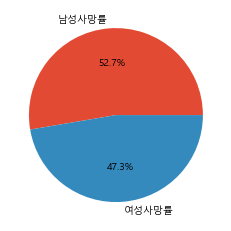

In [378]:
ratio=[korea_m.사망률.mean(),korea_w.사망률.mean()]
labels=['남성사망률','여성사망률']
plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()


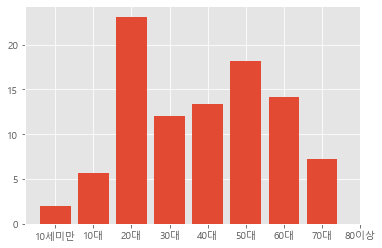

In [391]:

korea.확진률=korea.확진률.astype('float')
korea.사망률=korea.사망률.astype('float')

x=np.arange(9)
연령대=['10세미만','10대','20대','30대','40대','50대','60대','70대','80이상']
값=[korea.확진률[korea.구분=='0-9'].mean(),
korea.확진률[korea.구분=='10-19'].mean(),
korea.확진률[korea.구분=='20-29'].mean(),
korea.확진률[korea.구분=='30-39'].mean(),
korea.확진률[korea.구분=='40-49'].mean(),
korea.확진률[korea.구분=='50-59'].mean(),
korea.확진률[korea.구분=='60-69'].mean(),
korea.확진률[korea.구분=='70-79'].mean(),
korea.확진률[korea.구분=='80이상'].mean()]

plt.bar(x,값)
plt.xticks(x,연령대)
plt.show()

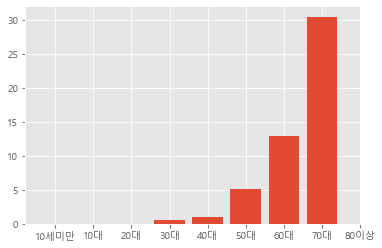

In [380]:
x=np.arange(9)
연령대=['10세미만','10대','20대','30대','40대','50대','60대','70대','80이상']
값=[korea.사망률[korea.구분=='0-9'].mean(),
korea.사망률[korea.구분=='10-19'].mean(),
korea.사망률[korea.구분=='20-29'].mean(),
korea.사망률[korea.구분=='30-39'].mean(),
korea.사망률[korea.구분=='40-49'].mean(),
korea.사망률[korea.구분=='50-59'].mean(),
korea.사망률[korea.구분=='60-69'].mean(),
korea.사망률[korea.구분=='70-79'].mean(),
korea.사망률[korea.구분=='80이상'].mean()]

plt.bar(x,값)
plt.xticks(x,연령대)
plt.show()


<AxesSubplot:>

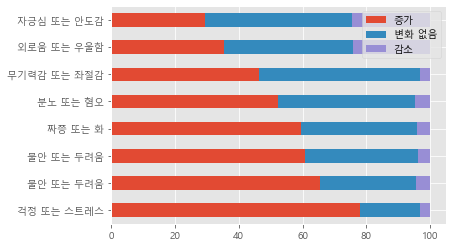

In [381]:
emotion = pd.read_csv('data/한국언론진흥재단_코로나19이후국민의일상변화조사_코로나19로 인한 감정 변화_20201231.csv',
                      encoding='cp949')
emotion = emotion.rename(index={0:'걱정 또는 스트레스',1:'불안 또는 두려움',
                               2:'불안 또는 두려움',
                                3:'짜쯩 또는 화',
                                4:'분노 또는 혐오',
                                5:'무기력감 또는 좌절감',
                                6:'외로움 또는 우울함',
                                7:'자긍심 또는 안도감'})
emotion.plot(kind='barh',stacked = True)